In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
    "text.latex.preamble": r"\usepackage{amsmath}"
})


In [2]:
def kl_divergence(p, q):
    epsilon = 1e-6  # Larger epsilon to avoid numerical issues
    p = torch.clamp(p, min=epsilon)
    q = torch.clamp(q, min=epsilon)
    return torch.sum(p * torch.log(p / q), dim=-1)

def jensen_shannon_divergence(p, q):
    m = 0.5 * (p + q)
    jsd = 0.5 * kl_divergence(p, m) + 0.5 * kl_divergence(q, m)
    return jsd

def jensen_shannon_distance(p, q):
    jsd = jensen_shannon_divergence(p, q)
    jsd = torch.clamp(jsd, min=0.0)  # Ensure no negative values
    return torch.sqrt(jsd)

In [6]:
d1_train = np.load('/Users/snehpandya/Projects/GCNN_DA/plots/js_distances_group_order/epoch_js_distances-d1.npy')
d1_train_1 = np.load('/Users/snehpandya/Projects/GCNN_DA/plots/js_distances_group_order/epoch_js_distances-d1-2.npy')
d2_train = np.load('/Users/snehpandya/Projects/GCNN_DA/plots/js_distances_group_order/epoch_js_distances-d2.npy')
d2_train_1 = np.load('/Users/snehpandya/Projects/GCNN_DA/plots/js_distances_group_order/epoch_js_distances-d2-2.npy')
d4_train = np.load('/Users/snehpandya/Projects/GCNN_DA/plots/js_distances_group_order/epoch_js_distances-d4.npy')
d4_train_1 = np.load('/Users/snehpandya/Projects/GCNN_DA/plots/js_distances_group_order/epoch_js_distances-d4-2.npy')
d8_train = np.load('/Users/snehpandya/Projects/GCNN_DA/plots/js_distances_group_order/epoch_js_distances-d8.npy')
d8_train_1 = np.load('/Users/snehpandya/Projects/GCNN_DA/plots/js_distances_group_order/epoch_js_distances-d8-2.npy')
cnn_train = np.load('/Users/snehpandya/Projects/GCNN_DA/plots/js_distances_group_order/epoch_js_distances-cnn.npy')
cnn_train_1 = np.load('/Users/snehpandya/Projects/GCNN_DA/plots/js_distances_group_order/epoch_js_distances-cnn-2.npy')

In [8]:
mean_d1 = (d1_train + d1_train_1) / 2
mean_d2 = (d2_train + d2_train_1) / 2
mean_d4 = (d4_train + d4_train_1) / 2
mean_d8 = (d8_train + d8_train_1) / 2
mean_cnn = (cnn_train + cnn_train_1) / 2

std_d1 = np.std(np.array([d1_train, d1_train_1]), axis=0)
std_d2 = np.std(np.array([d2_train, d2_train_1]), axis=0)
std_d4 = np.std(np.array([d4_train, d4_train_1]), axis=0)
std_d8 = np.std(np.array([d8_train, d8_train_1]), axis=0)
std_cnn = np.std(np.array([cnn_train, cnn_train_1]), axis=0)

(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x32a7527c0>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x32a763fd0>)

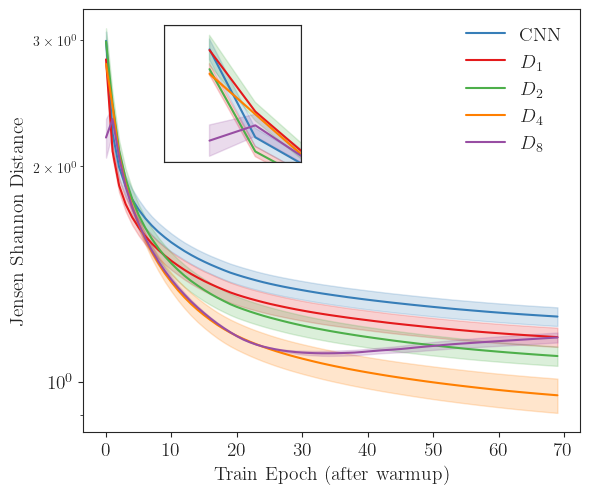

In [12]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
%matplotlib inline

colors = ['#377eb8',  # Blue
          '#e41a1c',  # Red
          '#4daf4a',  # Green
          '#ff7f00',  # Orange
          '#984ea3']  # Purple

plt.figure(figsize=(6, 5))
xs = np.arange(0, 70, 1)
plt.plot(xs, mean_cnn[30:], label=r'CNN', color=colors[0])
plt.plot(xs,mean_d1[30:], label=r'$D_1$', color=colors[1])
plt.plot(xs,mean_d2[30:], label=r'$D_2$', color=colors[2])
plt.plot(xs,mean_d4[30:], label=r'$D_4$', color=colors[3])
plt.plot(xs,mean_d8[30:], label=r'$D_8$', color=colors[4])

plt.fill_between(xs, mean_cnn[30:] - std_cnn[30:], mean_cnn[30:] + std_cnn[30:], color=colors[0], alpha=0.2)
plt.fill_between(xs, mean_d1[30:] - std_d1[30:], mean_d1[30:] + std_d1[30:], color=colors[1], alpha=0.2)
plt.fill_between(xs, mean_d2[30:] - std_d2[30:], mean_d2[30:] + std_d2[30:], color=colors[2], alpha=0.2)
plt.fill_between(xs,  mean_d4[30:] - std_d4[30:], mean_d4[30:] + std_d4[30:], color=colors[3], alpha=0.2)
plt.fill_between(xs, mean_d8[30:] - std_d8[30:], mean_d8[30:] + std_d8[30:], color=colors[4], alpha=0.2)

# plt.plot([30, 43.8], [d8_train[30], 2.24], color='black', linestyle='--', lw = 0.8)
# plt.plot([30, 43.8], [cnn_train[30], 2.88], color='black', linestyle='--', lw = 0.8)
# plt.plot([30, 55.5], [d8_train[30], 2.24], color='black', linestyle='--', lw = 0.8)
# plt.plot([30, 55.5], [cnn_train[30], 2.88], color='black', linestyle='--', lw = 0.8)
plt.legend(frameon=False, fontsize=14)
plt.yscale('log')
# plt.xscale('log')
plt.xlabel('Train Epoch (after warmup)', fontsize=14)
plt.ylabel('Jensen Shannon Distance', fontsize=14)
plt.tight_layout()
# increase ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Inset zoomed-in plot
axins = zoomed_inset_axes(plt.gca(), zoom=7, bbox_to_anchor=(0.3, 0.8), bbox_transform=plt.gca().transAxes, loc="center")
axins.plot(mean_cnn, color=colors[0])
axins.plot(mean_d2, color=colors[1])
axins.plot(mean_d1, color=colors[2])
axins.plot(mean_d4, color=colors[3])
axins.plot(mean_d8, color=colors[4])
axins.fill_between(range(len(mean_cnn)), mean_cnn - std_cnn, mean_cnn + std_cnn, color=colors[0], alpha=0.2)
axins.fill_between(range(len(mean_d1)), mean_d1 - std_d1, mean_d1 + std_d1, color=colors[1], alpha=0.2)
axins.fill_between(range(len(mean_d2)), mean_d2 - std_d2, mean_d2 + std_d2, color=colors[2], alpha=0.2)
axins.fill_between(range(len(mean_d4)), mean_d4 - std_d4, mean_d4 + std_d4, color=colors[3], alpha=0.2)
axins.fill_between(range(len(mean_d8)), mean_d8 - std_d8, mean_d8 + std_d8, color=colors[4], alpha=0.2)


# Set the range for the inset plot
x1, x2, y1, y2 = 29, 32, 2, 3.2  # adjust these values as needed for the initial points
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

# Hide tick labels on the inset plot
axins.set_xticks([])
axins.set_yticks([])

# Set the aspect ratio to make the inset less tall
axins.set_aspect((x2 - x1) / (y2 - y1))

# Connect the inset plot to the main plot with lines
mark_inset(plt.gca(), axins, loc1=1, loc2=1, fc="none", ec="0.5")
# plt.savefig('/Users/snehpandya/Projects/GCNN_DA/plots/jsd_mnistm.pdf', dpi=300, bbox_inches='tight')

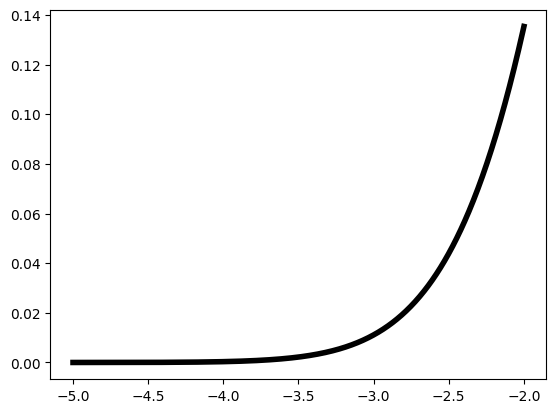

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values for each Gaussian, ensuring they don't overlap
x1 = np.linspace(-5, -2, 1000)  # Red Gaussian
x2 = np.linspace(-1, 2, 1000)   # Green Gaussian
x3 = np.linspace(3, 6, 1000)    # Blue Gaussian

# Define Gaussian functions with different heights
y1 = np.exp(-0.5 * (x1) ** 2) * 1.0 # Red
y2 = np.exp(-0.5 * (x2) ** 2) * 0.8  # Green
y3 = np.exp(-0.5 * (x3) ** 2) * 0.6  # Blue

# Plot each Gaussian with thick black borders
plt.plot(x1, y1, color='red', linewidth=2)
plt.plot(x1, y1, color='black', linewidth=4)

# plt.plot(x2, y2, color='green', linewidth=2)
# plt.plot(x2, y2, color='black', linewidth=4)

# plt.plot(x3, y3, color='blue', linewidth=2)
# plt.plot(x3, y3, color='black', linewidth=4)

# Remove axes for cartoon-style plot
# plt.axis('off')

# Show plot
plt.show()


(-13.541929676090518,
 33.54192967609052,
 -0.01590368359606332,
 0.33397735551732965)

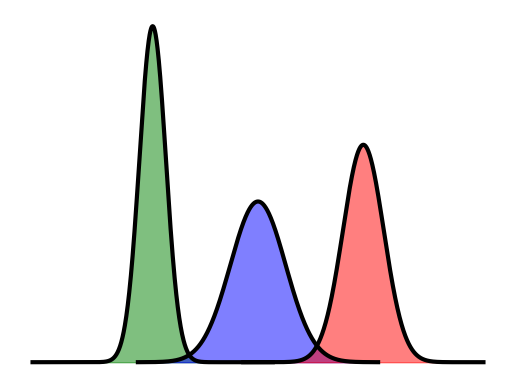

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import mat
mu = 0
variance = 1.3
sigma = math.sqrt(variance)
x = np.linspace(mu - 10*sigma, mu + 10*sigma, 1000)
plt.plot(x, stats.norm.pdf(x, mu, 1.1*sigma), color = 'black', lw=3)
## shade the area under the curve
plt.fill_between(x, stats.norm.pdf(x, mu, 1.1*sigma), color='green', alpha=0.5)
plt.plot(x+10, stats.norm.pdf(x, mu, 2.3*sigma), color = 'black', lw=3)
plt.fill_between(x+10, stats.norm.pdf(x, mu, 2.3*sigma), color='blue', alpha=0.5)
plt.plot(x+20, stats.norm.pdf(x, mu, 1.7*sigma), color = 'black', lw=3)
plt.fill_between(x+20, stats.norm.pdf(x, mu, 1.7*sigma), color='red', alpha=0.5)
plt.axis('off')
# plt.ylim(0, 1)
# plt.show()
# plt.savefig('/Users/snehpandya/Projects/GCNN_DA/plots/gaussian.pdf', dpi=300, bbox_inches='tight')


(-13.541929676090518,
 33.54192967609052,
 -0.01590368359606332,
 0.33397735551732965)

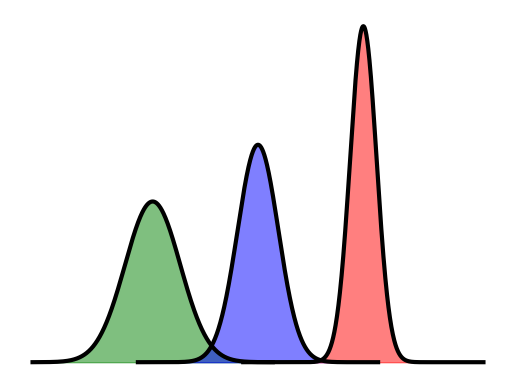

In [149]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
mu = 0
variance = 1.3
sigma = math.sqrt(variance)
x = np.linspace(mu - 10*sigma, mu + 10*sigma, 1000)
plt.plot(x, stats.norm.pdf(x, mu, 2.3*sigma), color = 'black', lw=3)
## shade the area under the curve
plt.fill_between(x, stats.norm.pdf(x, mu, 2.3*sigma), color='green', alpha=0.5)
plt.plot(x+10, stats.norm.pdf(x, mu, 1.7*sigma), color = 'black', lw=3)
plt.fill_between(x+10, stats.norm.pdf(x, mu, 1.7*sigma), color='blue', alpha=0.5)
plt.plot(x+20, stats.norm.pdf(x, mu, 1.1*sigma), color = 'black', lw=3)
plt.fill_between(x+20, stats.norm.pdf(x, mu, 1.1*sigma), color='red', alpha=0.5)
plt.axis('off')
# plt.ylim(0, 1)
# plt.show()
# plt.savefig('/Users/snehpandya/Projects/GCNN_DA/plots/gaussian.pdf', dpi=300, bbox_inches='tight')


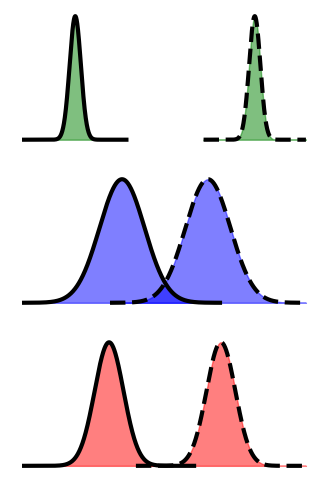

In [131]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

fig, ax = plt.subplots(3, 1, figsize=(4, 6))
mu = 0
variance = 1.3
sigma = math.sqrt(variance)
x = np.linspace(mu - 10*sigma, mu + 10*sigma, 1000)
## turn all axes off
ax[0].axis('off')
ax[0].plot(x, stats.norm.pdf(x, mu, 1.1*sigma), color = 'black', lw=3)
ax[0].fill_between(x, stats.norm.pdf(x, mu, 1.1*sigma), color='green', alpha=0.5)
ax[0].plot(x+, stats.norm.pdf(x, mu, 1.1*sigma), color = 'black', lw=3, ls = '--')
ax[0].fill_between(x+40, stats.norm.pdf(x, mu, 1.1*sigma), color='green', alpha=0.5)

ax[1].axis('off')
ax[1].plot(x, stats.norm.pdf(x, mu, 2.3*sigma), color = 'black', lw=3)
ax[1].fill_between(x, stats.norm.pdf(x, mu, 2.3*sigma), color='blue', alpha=0.5)
ax[1].plot(x+10, stats.norm.pdf(x, mu, 2.3*sigma), color = 'black', lw=3, ls = '--')
ax[1].fill_between(x+10, stats.norm.pdf(x, mu, 2.3*sigma), color='blue', alpha=0.5)

ax[2].axis('off')
ax[2].plot(x, stats.norm.pdf(x, mu, 1.7*sigma), color = 'black', lw=3)
ax[2].fill_between(x, stats.norm.pdf(x, mu, 1.7*sigma), color='red', alpha=0.5)
ax[2].plot(x+15, stats.norm.pdf(x, mu, 1.7*sigma), color = 'black', lw=3, ls = '--')
ax[2].fill_between(x+15, stats.norm.pdf(x, mu, 1.7*sigma), color='red', alpha=0.5)

## shade the area under the curve
# plt.fill_between(x, stats.norm.pdf(x, mu, 1.1*sigma), color='green', alpha=0.5)
# plt.plot(x+10, stats.norm.pdf(x, mu, 2.3*sigma), color = 'black', lw=3)
# plt.fill_between(x+10, stats.norm.pdf(x, mu, 2.3*sigma), color='blue', alpha=0.5)
# plt.plot(x+20, stats.norm.pdf(x, mu, 1.7*sigma), color = 'black', lw=3)
# plt.fill_between(x+20, stats.norm.pdf(x, mu, 1.7*sigma), color='red', alpha=0.5)
# plt.axis('off')
# plt.ylim(0, 1)
# plt.show()
# plt.savefig('/Users/snehpandya/Projects/GCNN_DA/plots/gaussian.pdf', dpi=300, bbox_inches='tight')


In [35]:
import numpy as np
brier = [0.012033253261983665,0.01871853444014683,0.015841905920994513]
ece = [0.042575671056361425, 0.06243674449132959,0.05469895735614411]
print(np.mean(ece), np.std(ece))
print(np.mean(brier), np.std(brier))


0.05323712430127838 0.008173872048893478
0.015531231207708336 0.002738081468337792


(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x3395641f0>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x3392abee0>)

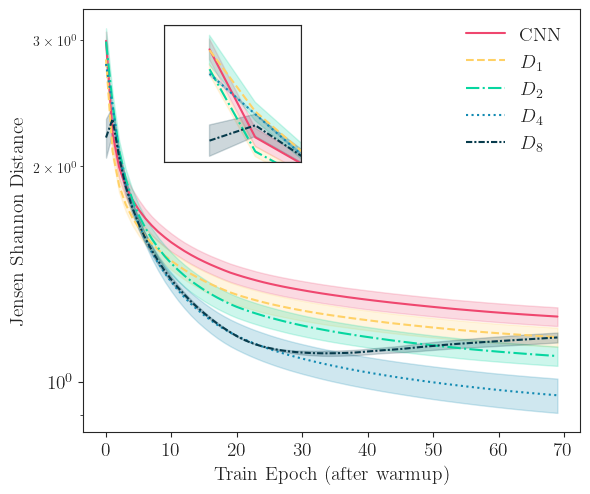

In [49]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
%matplotlib inline

colors = ['#ef476f',  # Orange
          '#ffd166',  # Blue
          '#06d6a0',  # Green
          '#118ab2',  # Light Blue
          '#073b4c']  # Pink

line_styles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1))]  # Solid, dashed, dash-dot, dotted, custom

plt.figure(figsize=(6, 5))
xs = np.arange(0, 70, 1)
plt.plot(xs, mean_cnn[30:], label=r'CNN', color=colors[0], linestyle=line_styles[0])
plt.plot(xs,mean_d1[30:], label=r'$D_1$', color=colors[1], linestyle=line_styles[1])
plt.plot(xs,mean_d2[30:], label=r'$D_2$', color=colors[2], linestyle=line_styles[2])
plt.plot(xs,mean_d4[30:], label=r'$D_4$', color=colors[3], linestyle=line_styles[3])
plt.plot(xs,mean_d8[30:], label=r'$D_8$', color=colors[4], linestyle=line_styles[4])

plt.fill_between(xs, mean_cnn[30:] - std_cnn[30:], mean_cnn[30:] + std_cnn[30:], color=colors[0], alpha=0.2)
plt.fill_between(xs, mean_d1[30:] - std_d1[30:], mean_d1[30:] + std_d1[30:], color=colors[1], alpha=0.2)
plt.fill_between(xs, mean_d2[30:] - std_d2[30:], mean_d2[30:] + std_d2[30:], color=colors[2], alpha=0.2)
plt.fill_between(xs,  mean_d4[30:] - std_d4[30:], mean_d4[30:] + std_d4[30:], color=colors[3], alpha=0.2)
plt.fill_between(xs, mean_d8[30:] - std_d8[30:], mean_d8[30:] + std_d8[30:], color=colors[4], alpha=0.2)

# plt.plot([30, 43.8], [d8_train[30], 2.24], color='black', linestyle='--', lw = 0.8)
# plt.plot([30, 43.8], [cnn_train[30], 2.88], color='black', linestyle='--', lw = 0.8)
# plt.plot([30, 55.5], [d8_train[30], 2.24], color='black', linestyle='--', lw = 0.8)
# plt.plot([30, 55.5], [cnn_train[30], 2.88], color='black', linestyle='--', lw = 0.8)
plt.legend(frameon=False, fontsize=14)
plt.yscale('log')
# plt.xscale('log')
plt.xlabel('Train Epoch (after warmup)', fontsize=14)
plt.ylabel('Jensen Shannon Distance', fontsize=14)
plt.tight_layout()
# increase ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.yticks([1, 5], ['1', '5'])

# Inset zoomed-in plot
axins = zoomed_inset_axes(plt.gca(), zoom=7, bbox_to_anchor=(0.3, 0.8), bbox_transform=plt.gca().transAxes, loc="center")
axins.plot(mean_cnn, color=colors[0], linestyle=line_styles[0])
axins.plot(mean_d2, color=colors[1], linestyle=line_styles[1])
axins.plot(mean_d1, color=colors[2], linestyle=line_styles[2])
axins.plot(mean_d4, color=colors[3], linestyle=line_styles[3])
axins.plot(mean_d8, color=colors[4], linestyle=line_styles[4])
axins.fill_between(range(len(mean_cnn)), mean_cnn - std_cnn, mean_cnn + std_cnn, color=colors[0], alpha=0.2)
axins.fill_between(range(len(mean_d1)), mean_d1 - std_d1, mean_d1 + std_d1, color=colors[1], alpha=0.2)
axins.fill_between(range(len(mean_d2)), mean_d2 - std_d2, mean_d2 + std_d2, color=colors[2], alpha=0.2)
axins.fill_between(range(len(mean_d4)), mean_d4 - std_d4, mean_d4 + std_d4, color=colors[3], alpha=0.2)
axins.fill_between(range(len(mean_d8)), mean_d8 - std_d8, mean_d8 + std_d8, color=colors[4], alpha=0.2)
# axins.text(29.25, 2.1, '$D_8$', fontsize=12)
# axins.text(29.25, 2.5, '$D_4$', fontsize=12)
# axins.text(29.25, 2.7, '$D_2$', fontsize=12)
# axins.text(29.25, 2.9, '$D_1$', fontsize=12)
# axins.text(29.25, 3.1, 'CNN', fontsize=12)


# Set the range for the inset plot
x1, x2, y1, y2 = 29, 32, 2, 3.2  # adjust these values as needed for the initial points
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

# Hide tick labels on the inset plot
axins.set_xticks([])
axins.set_yticks([])

# Set the aspect ratio to make the inset less tall
axins.set_aspect((x2 - x1) / (y2 - y1))

# Connect the inset plot to the main plot with lines
mark_inset(plt.gca(), axins, loc1=1, loc2=1, fc="none", ec="0.5")
# plt.savefig('/Users/snehpandya/Projects/GCNN_DA/plots/jsd_mnistm_v2.pdf', dpi=300, bbox_inches='tight')